## **A/B Testing - Montana University Website Homepage**

## Project Description



The Montana State University Library has a website that students use to find books and articles.

Below the library picture, there is a search bar and three big items: “Find”, “Request” and “Interact”. All three of them contain access to important information and services about the library. However, the Website Analytics show that the “Interact” button has, ironically, almost no interactions.

<img width="1221" alt="Screen Shot 2023-04-22 at 6 42 57 PM" src="https://user-images.githubusercontent.com/90986708/233796469-6bb38ade-83e8-4915-ae69-92efefd4a713.png">


The way to measure how each one of the three categories performs is by click-through rate (CTR), a common term in Online Marketing which typically describes the number of clicks an ad receives divided by the number of times the ad is shown.

_______________

The main purpose of this project is to perform an A/B Test to check CTR (click-through rate) for different text on a button on the website of Montana S. University.


The website team decided on 4 different new versions to test against the "Interaction" button:

- Connect
- Learn
- Help
- Services

The metrics to track were following:

- **Click-through rate (CTR) for the homepage:** Amount of clicks on the button divided by the total visits to the page. Selected as a measure of the initial ability of the category title to attract users.

- **Drop-off rate for the category pages:** Percentage of visitors who leave the site from a given page, selected as a measure of the ability of the category page to meet user expectations.

- **Homepage-return rate for the category pages:** Percentage of users who navigated from the library homepage to the category page, then returned back to the homepage. Homepage-return rate was therefore selected as a measure of the ability of the category page to meet user expectations.



Here are the steps of this project;

- Explore and prepare the data
- Define the hypothesis
- Find Click Through Rates (CTR)
- Test the hypothesis
- Analyze the results
- Draw conclusions

## 1.Explore and prepare the data

In [ ]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# import data

# interact.csv
url = 'https://drive.google.com/file/d/1NJOTpUiPUmxYOogHneBIXIISBfds7Fcq/view?usp=share_link' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
interact = pd.read_csv(path)

# help.csv
url = 'https://drive.google.com/file/d/1hq_G4204nhSUqlRJ_B5XBOSiAophjik0/view?usp=share_link' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
help = pd.read_csv(path)

# services.csv
url = 'https://drive.google.com/file/d/1BDGBmB1QiVidoaTgA1ABrXOOmWYrr2q9/view?usp=share_link' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
services = pd.read_csv(path)

# connect.csv
url = 'https://drive.google.com/file/d/1TiqCloQd6vyy6U0HlyoAFnNBN9J66SmU/view?usp=share_link' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
connect = pd.read_csv(path)

# learn.csv
url = 'https://drive.google.com/file/d/18p2vFO3v2Q1BySpEoVfdnaWL3oDvjP1W/view?usp=share_link' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
learn = pd.read_csv(path)


In [ ]:
interact.head(2)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,128,area,Montana State University - Home,1291,False,Homepage Version 1 - Interact • http://www...
1,69,a,FIND,842,True,created 5-29-2013 • 20 days 4 hours 21 min...


In [ ]:
help.head(2)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,74,a,FIND,631,True,Homepage Version 4 - Help • http://www.lib...
1,66,input,s.q,364,True,created 5-29-2013 • 20 days 4 hours 59 min...


In [ ]:
services.head(2)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,69,a,FIND,397,True,Homepage Version 5 - Services • http://www...
1,61,input,s.q,323,True,created 5-29-2013 • 20 days 4 hours 59 min...


In [ ]:
connect.head(2)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,74,a,FIND,502,True,Homepage Version 2 - Connect • http://www....
1,66,input,s.q,357,True,created 5-29-2013 • 20 days 7 hours 34 min...


In [ ]:
learn.head(2)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,69,a,FIND,587,True,Homepage Version 3 - Learn • http://www.li...
1,61,input,s.q,325,True,created 5-29-2013 • 20 days 12 hours 21 mi...


In [ ]:
# Observed results
Click = [42, 38, 45, 53, 21]
No_click = [10241, 3142, 2019, 2689, 2726]

# Display the data in the form of a contingency table
observed = pd.DataFrame([Click, No_click],
                           columns = ["interact", "help", "services", "connect", "learn"],
                           index = ["Click", "No_click"])

observed

,interact,help,services,connect,learn
Click,42,38,45,53,21
No_click,10241,3142,2019,2689,2726


In [ ]:
# Expand the observed dataframe by adding a row and a column containing the totals of each column and row, respectively.
observed_expanded = observed.copy()
observed_expanded
     

# Create a new row called "Total" with the totals of each column.
observed_expanded.loc["Total"] = observed_expanded.sum()
# Create a new column called "Total" with the totals of each row.
observed_expanded["Total"] = observed_expanded["interact"] + observed_expanded["help"] + observed_expanded["services"] + observed_expanded["connect"]  + observed_expanded["learn"]
observed_expanded

,interact,help,services,connect,learn,Total
Click,42,38,45,53,21,199
No_click,10241,3142,2019,2689,2726,20817
Total,10283,3180,2064,2742,2747,21016


⭐ **Combining all the versions in a dataframe**

In [ ]:
interact_clicks=interact.loc[[9]]
interact_clicks['visits'] = 10283
interact_clicks['total_clicks']=3714
interact_clicks

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information,visits,total_clicks
9,87,a,INTERACT,42,True,NaN,10283,3714


In [ ]:
help_clicks=help.loc[[7]]
help_clicks['visits'] = 3180
help_clicks['total_clicks']=1717
help_clicks

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information,visits,total_clicks
7,92,a,HELP,38,True,NaN,3180,1717


In [ ]:
services_clicks=services.loc[[7]]
services_clicks['visits'] = 2064
services_clicks['total_clicks']=1348
services_clicks

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information,visits,total_clicks
7,87,a,SERVICES,45,True,NaN,2064,1348


In [ ]:
connect_clicks=connect.loc[[6]]
connect_clicks['visits'] = 2742
connect_clicks['total_clicks']=1587
connect_clicks

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information,visits,total_clicks
6,92,a,CONNECT,53,True,NaN,2742,1587


In [ ]:
learn_clicks=learn.loc[[10]]
learn_clicks['visits'] = 2747
learn_clicks['total_clicks']=1652
learn_clicks

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information,visits,total_clicks
10,87,a,LEARN,21,True,NaN,2747,1652


In [ ]:
all_versions_clicks = pd.concat([interact_clicks,help_clicks,services_clicks,connect_clicks,learn_clicks])
all_versions_clicks

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information,visits,total_clicks
9,87,a,INTERACT,42,True,NaN,10283,3714
7,92,a,HELP,38,True,NaN,3180,1717
7,87,a,SERVICES,45,True,NaN,2064,1348
6,92,a,CONNECT,53,True,NaN,2742,1587
10,87,a,LEARN,21,True,NaN,2747,1652


⭐**We will use the chi-square test as we have categorical data and want to compare the proportions and  determine if there is a significant difference in engagement between the groups.**

## 2.Define the hypothesis

- Null Hypothesis ( 𝐻0 )        : CRT(interact) = CRT(help) = CRT(services) = CRT(connect) = CRT(learn)

(There is no significant difference between the versions of the button in terms of conversion. The observed differences are due to chance.)


- Alternative Hypothesis ( 𝐻𝐴 ) : at least one of the versions has a significantly better or worse CRT than the others.

(There is a significant difference between the versions of the button in terms of conversion. At least one version is more effective than others.)

## 3.Find Click Through Rates (CTR)

In [ ]:
# We can find the CTR by dividing no clicks values by visits
all_versions_clicks["CTR"] = (all_versions_clicks["No. clicks"] / all_versions_clicks["visits"])*100

In [ ]:
all_versions_clicks.sort_values(by="CTR", ascending=False)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information,visits,total_clicks,CTR
7,87,a,SERVICES,45,True,NaN,2064,1348,2.180233
6,92,a,CONNECT,53,True,NaN,2742,1587,1.932896
7,92,a,HELP,38,True,NaN,3180,1717,1.194969
10,87,a,LEARN,21,True,NaN,2747,1652,0.764470
9,87,a,INTERACT,42,True,NaN,10283,3714,0.408441


In [ ]:
# Creating CTR Dataframe
CTR = [0.408441, 1.194969, 2.180233, 1.932896, 0.764470]
columns = ["interact", "help", "services", "connect", "learn"]

CTR_df = pd.DataFrame([CTR],
                           columns = [columns],
                           index = ["CTR"])

CTR_df

,interact,help,services,connect,learn
CTR,0.408441,1.194969,2.180233,1.932896,0.76447


**For CTR:**

- “Services” and “Connect” are the best performers.
- “Interact” and “Learn” are the worst performers,

**services > connect > help > learn > interact**

But this just tells us that some version(s) performed better (or worse) than others. We can be sure that the best version (Services) performed better than the worst one (Interact).

But we cannot be sure that the differences between them are significant.

## 4.Test the hypothesis

### First Chi-square Test (for CTR)

- Null Hypothesis ( 𝐻0 )        : CRT(interact) = CRT(help) = CRT(services) = CRT(connect) = CRT(learn)

(The 5 versions of the button are equally likely to receive clicks, and the observed differences are due to chance. )

- Alternative Hypothesis ( 𝐻𝐴 ) : at least one of the versions has a significantly better or worse CRT than the others.

(The observed differences are not due to chance: there is at least one version that got so many more/much less clicks than the others that this can hardly be explained just by chance)

**The desired Statistical Significance was chosen to be 90%**:

it is a bit lower than the usual scientific standard of 95% because the consequences of rejecting the null hypothesis when it is true.

In [ ]:
# for a confidence level of 90%
# desidered statistical significance = 90%
# the significance level is (p-value) 1 – 0.9 = 0.1

alpha = 0.1

In [ ]:
from scipy import stats
chisq, pvalue, df, expected = stats.chi2_contingency(observed, correction=False)

In [ ]:
chisq

96.7432353798328

In [ ]:
pvalue

4.852334301093838e-20

In [ ]:
expected

array([[   97.3694804 ,    30.11134374,    19.5439665 ,    25.96393224,
           26.01127712],
       [10185.6305196 ,  3149.88865626,  2044.4560335 ,  2716.03606776,
         2720.98872288]])

In [ ]:
df

4

In [ ]:
if pvalue > alpha:
  print("The p-value is larger than alpha. We accept the Null Hypothesis.")
else:
  print("The p-value is smaller than alpha. We accept the Alternative Hypothesis.")

The p-value is smaller than alpha. We accept the Alternative Hypothesis.


Alternative Hypothesis ( 𝐻𝐴 ) : at least one of the versions has a significantly better or worse CRT than the others.

(The observed differences are not due to chance: there is at least one version that got so many more/much less clicks than the others that this can hardly be explained just by chance)

### Second Chi-square Test (for CTR)

One possible approach to solve this is to narrow down the candidates: simply kick out the worst performer, and run the test again. In this case, we will drop “Interact”:

In [ ]:
observed = observed.drop("interact", axis=1)

In [ ]:
observed

,help,services,connect,learn
Click,38,45,53,21
No_click,3142,2019,2689,2726


- Null Hypothesis ( 𝐻0 )        : CRT(help) = CRT(services) = CRT(connect) = CRT(learn)

(The 4 versions of the button are equally likely to receive clicks, and the observed differences are due to chance. )

- Alternative Hypothesis ( 𝐻𝐴 ) : at least one of the versions has a significantly better or worse CRT than the others.

(The observed differences are not due to chance: there is at least one version that got so many more/much less clicks than the others that this can hardly be explained just by chance)

In [ ]:
alpha = 0.1

In [ ]:
chisq, pvalue, df, expected = stats.chi2_contingency(observed, correction=False)

In [ ]:
chisq

22.450979530401828

In [ ]:
pvalue

5.25509870228566e-05

In [ ]:
expected

array([[  46.51635144,   30.19174509,   40.10938228,   40.1825212 ],
       [3133.48364856, 2033.80825491, 2701.89061772, 2706.8174788 ]])

In [ ]:
df

3

In [ ]:
if pvalue > alpha:
  print("The p-value is larger than alpha. We accept the Null Hypothesis.")
else:
  print("The p-value is smaller than alpha. We accept the Alternative Hypothesis.")

The p-value is smaller than alpha. We accept the Alternative Hypothesis.


**Since the p-value is smaller than alpha, we accept the Alternative Hypothesis.**

- Alternative Hypothesis ( 𝐻𝐴 ) : at least one of the versions has a significantly better or worse CRT than the others.
(The observed differences are not due to chance: there is at least one version that got so many more/much less clicks than the others that this can hardly be explained just by chance)

- We can assume that the Null Hypothesis is true: **There is a statistically significant difference between the means of the control group and the test group.**

### Third Chi-square Test (for CTR)

We narrow down the candidates: simply kick out the second worst performer, and run the test again. In this case, we will drop Learn:

In [ ]:
observed = observed.drop("learn", axis=1)

In [ ]:
observed

,help,services,connect
Click,38,45,53
No_click,3142,2019,2689


- Null Hypothesis ( 𝐻0 )        : CRT(help) = CRT(services) = CRT(connect)

(The 3 versions of the button are equally likely to receive clicks, and the observed differences are due to chance. )

- Alternative Hypothesis ( 𝐻𝐴 ) : at least one of the versions has a significantly better or worse CRT than the others.

(The observed differences are not due to chance: there is at least one version that got so many more/much less clicks than the others that this can hardly be explained just by chance)

In [ ]:
alpha = 0.1

In [ ]:
chisq, pvalue, df, expected = stats.chi2_contingency(observed, correction=False)

In [ ]:
chisq

8.57683071094785

In [ ]:
pvalue

0.013726659948517513

In [ ]:
expected

array([[  54.15477085,   35.14951165,   46.69571751],
       [3125.84522915, 2028.85048835, 2695.30428249]])

In [ ]:
df

2

In [ ]:
if pvalue > alpha:
  print("The p-value is larger than alpha. We accept the Null Hypothesis.")
else:
  print("The p-value is smaller than alpha. We accept the Alternative Hypothesis.")

The p-value is smaller than alpha. We accept the Alternative Hypothesis.


**Since the p-value is smaller than alpha, we accept the Alternative Hypothesis.**

- Alternative Hypothesis ( 𝐻𝐴 ) : at least one of the versions has a significantly better or worse CRT than the others.
(The observed differences are not due to chance: there is at least one version that got so many more/much less clicks than the others that this can hardly be explained just by chance)

- We can assume that the Null Hypothesis is true: **There is a statistically significant difference between the means of the control group and the test group.**

### Fourth Chi-square Test (for CTR)

We narrow down the candidates: simply kick out the thirth worst performer, and run the test again. In this case, we will drop Help:

In [ ]:
observed = observed.drop("help", axis=1)

In [ ]:
observed

,services,connect
Click,45,53
No_click,2019,2689


- Null Hypothesis ( 𝐻0 )        : CRT(services) = CRT(connect)

(The 2 versions of the button are equally likely to receive clicks, and the observed differences are due to chance. )

- Alternative Hypothesis ( 𝐻𝐴 ) : at least one of the versions has a significantly better or worse CRT than the others.

(The observed differences are not due to chance: there is at least one version that got so many more/much less clicks than the others that this can hardly be explained just by chance)

In [ ]:
alpha = 0.1

In [ ]:
chisq, pvalue, df, expected = stats.chi2_contingency(observed, correction=False)

In [ ]:
chisq

0.36064180794754525

In [ ]:
pvalue

0.5481500077135573

In [ ]:
expected

array([[  42.08739076,   55.91260924],
       [2021.91260924, 2686.08739076]])

In [ ]:
df

1

In [ ]:
if pvalue > alpha:
  print("The p-value is larger than alpha. We accept the Null Hypothesis.")
else:
  print("The p-value is smaller than alpha. We accept the Alternative Hypothesis.")

The p-value is larger than alpha. We accept the Null Hypothesis.


**Since the p-value is greater than alpha, we accept the Null Hypothesis.**

- Null Hypothesis ( 𝐻0 ) : CRT(services) = CRT(connect)
(The 2 versions of the button are equally likely to receive clicks, and the observed differences are due to chance. )

- We can assume that the Null Hypothesis is true: **There is no statistically significant difference between the means of the control group and the test group.**

## 5.Analyze the results

### Chi-square Test Results for the CTR 

⭐ **Services and Connect** have better CTR (and Services have a higher CTR). 

But these 2 versions are equally likely to receive clicks, and the observed differences are due to chance. Hereafter we can just examine these two versions.

### Students' Ideas

Here are some of the ideas of the students.

**Sophomore student:**

“Services is more accurate. 

“Connect is too vague and too close to Interact.”

**Junior student:**

“Help is the best, then Services too.”

**Senior student:**

“Services works.”

“Connect is better than Interact, but neither are very good.”

⭐ Students liked **Services** version more.

### Homepage-return Rate

- If a user cannot find the desired option on the category page, the user will likely return to the home page to continue browsing.
- If the HRT lower, that's better for us.

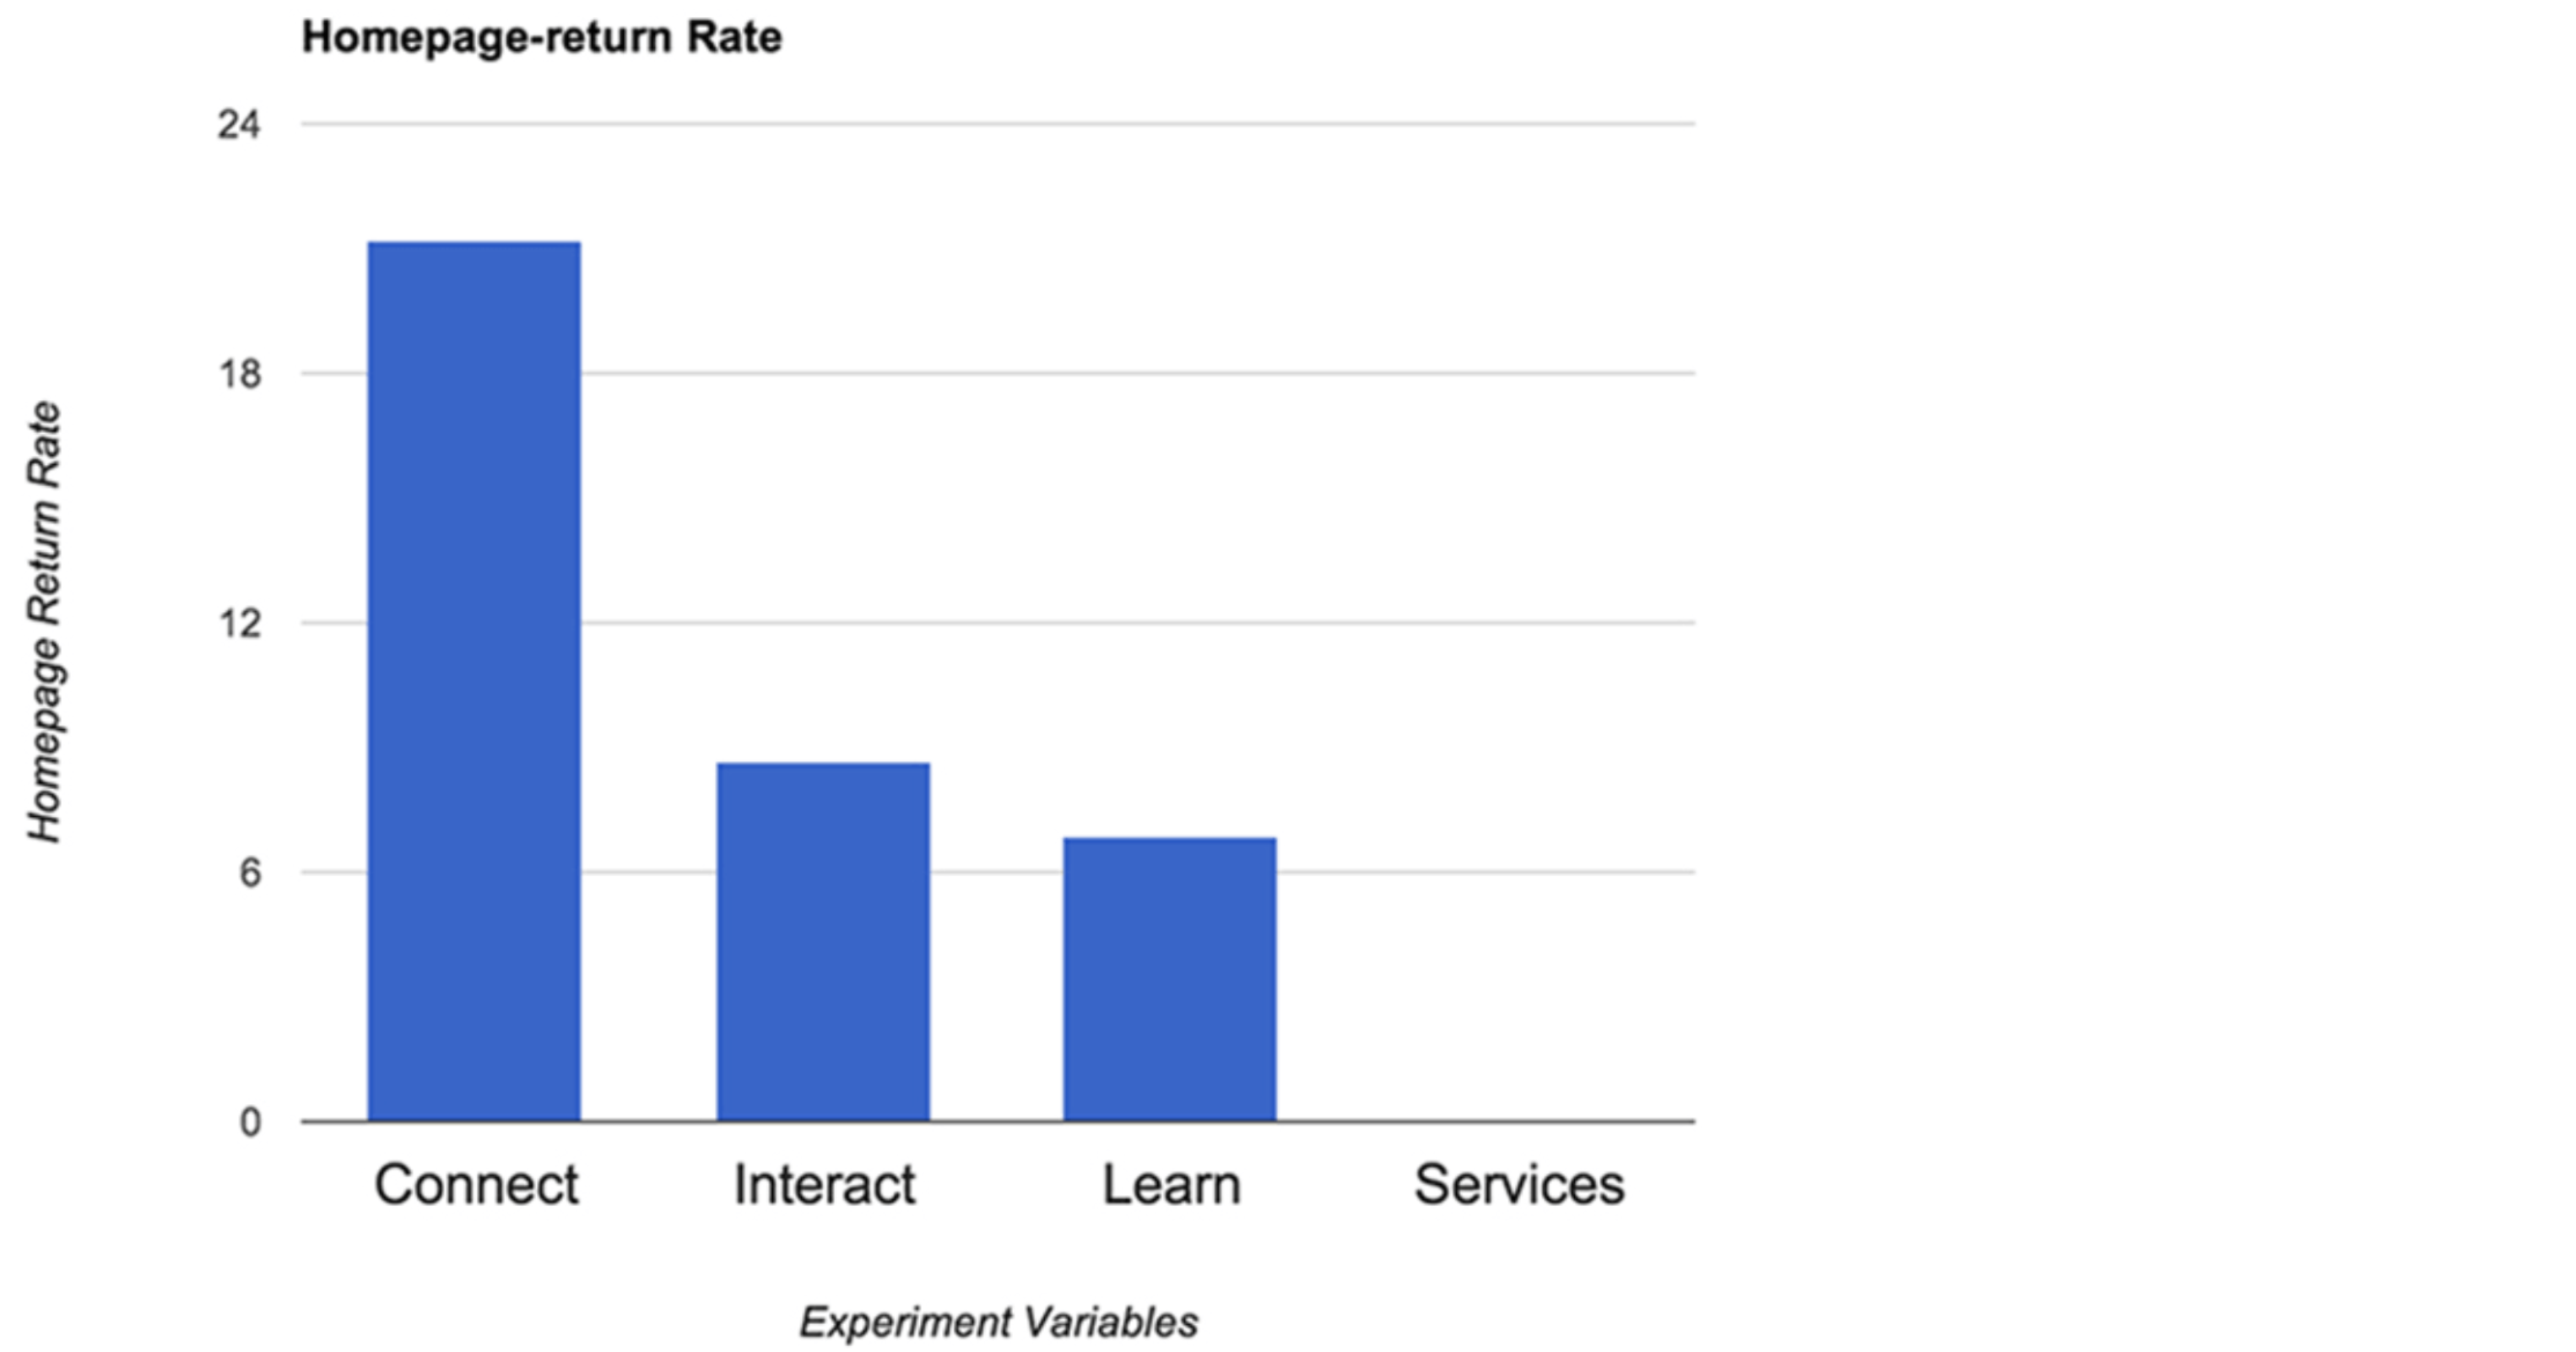

Users who use the Connect version, cannot find the information they want and return to the homepage.

⭐ **The Services version is better at giving information to users  they want.**

### Drop-off Rate

- If a user can find the desired option on the category page, the user will likely close the category page.
- If the Drop-off rate higher, that's better for us.

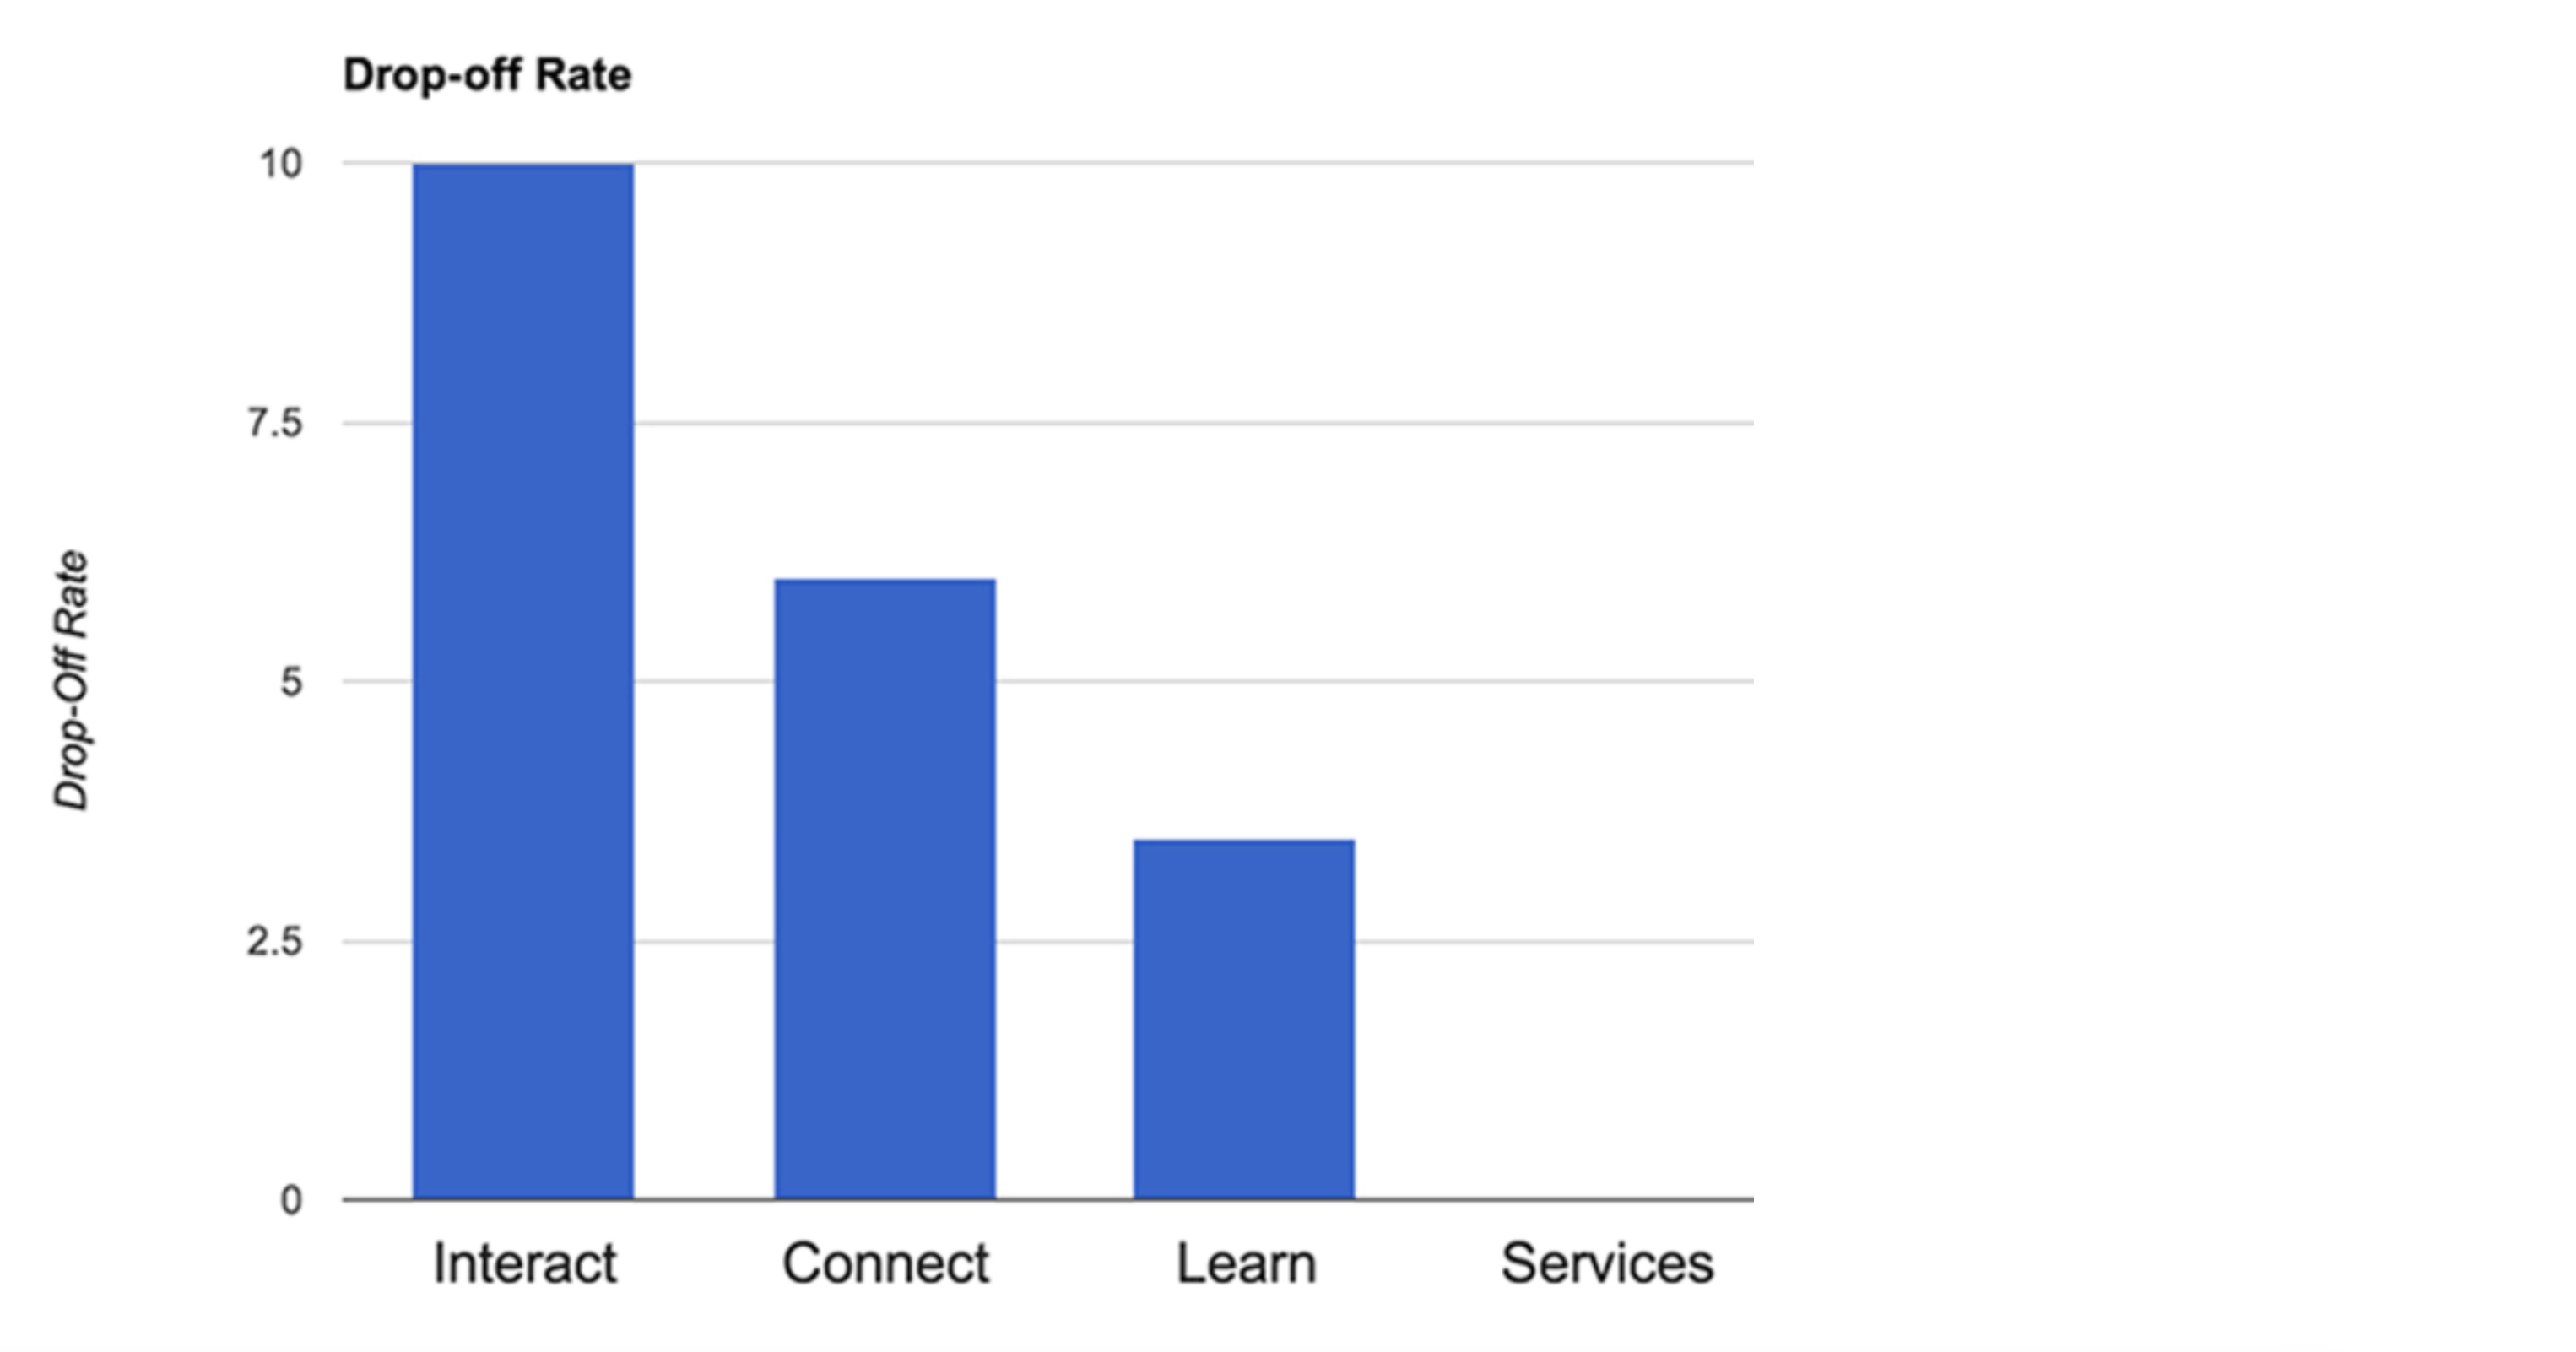

⭐ **Connect version looks better rather than Services: Users may find the desired option on the category page, and will likely close the category page.**

## 6.Draw conclusions

It is strongly advised to change the library's homepage and roll out the design with the "**Services**" button according to the following reasons:

- **Services** shows the best click-through rate (CTR) of all options.

- **Services** version is better at giving information to users they want as it has a lower Homepage-return Rate.

- Students likes **Services** version more, rather than Connect.



